# **YOLOv4 訓練課程**

第二堂課 訓練 YOLOv4 模型

相關網站

https://mrhandbyhand.medium.com/hand-by-hand-train-your-yolov4-kaggle-dataset-ac1456e06604

# **STEP 1:筆記本設定**

新增一個筆記本檔案

在 "執行階段"->"變更執行階段類型",選擇啟用GPU

並輸入 ! nvidia-smi (前面要有!)查看 GPU 資訊

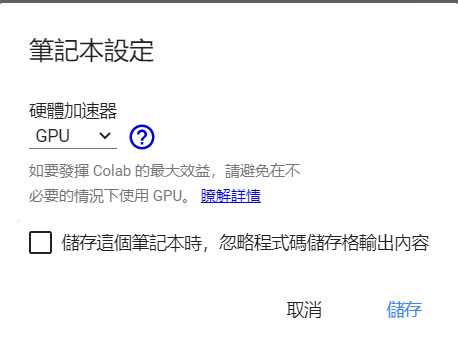

In [ ]:
! nvidia-smi

# **STEP 2:從GitHub上，clone YOLOv4模型(DarkNet)**

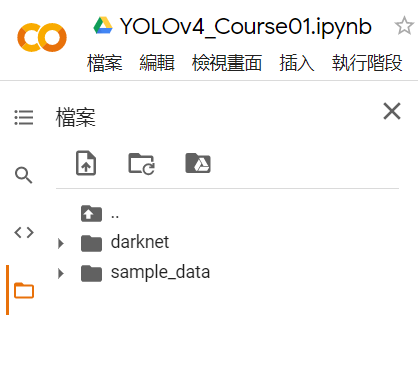

In [ ]:
! git clone https://github.com/AlexeyAB/darknet.git

# **STEP 3:查看 Makefile**

In [ ]:
! head darknet/Makefile

# **STEP 4:修改參數為GPU=1、CUDNN=1、OPENCV=1**

參數說明
* GPU=1 啟用 GPU 加速
* CUDNN=1 使用 cuDNN v5-v7，加速 GPU
* OPENCV=1 啟用 OpenCV

In [ ]:
! sed -i "s/GPU=0/GPU=1/g" /content/darknet/Makefile
! sed -i "s/CUDNN=0/CUDNN=1/g" /content/darknet/Makefile
! sed -i "s/OPENCV=0/OPENCV=1/g" /content/darknet/Makefile
! head darknet/Makefile

# **STEP 5:編譯 YOLOv4**



In [ ]:
! cd darknet; make

# **STEP 6:下載預備做訓練的權重**

yolov4.conv.137

In [ ]:
! gdown https://drive.google.com/u/0/uc?id=1JKF-bdIklxOOVy-2Cr5qdvjgGpmGfcbp

# **STEP 7:開始訓練**

注意路徑與其意義，非直接執行，三個路徑參數，詳看 ppt 內容

In [ ]:
! ls -la darknet/data

In [ ]:
! cd /content/darknet; ./darknet detector train data/mask.data cfg/yolov4-mask.cfg weights/yolov4.conv.137 -dont_show

# 何時結束訓練？

darknet 文件提到訓練時 avg_loss 介於 0.05(小模型、簡易資料集) ~ 3.0(大模型、複雜資料集) 即可中止訓練，它會將權重存到 darknet/backup 資料夾 (每 1000 iteration 會自動存一次，中斷訓練前也會存最後一次)

# **附註:防止 CoLab 斷線的方法**

https://blog.csdn.net/liupeng19970119/article/details/105625334

在 Chrome 中，按下 F12，於 Console 中，輸入以下 JS 碼

function ClickConnect(){
  colab.config
  console.log("Connnect Clicked - Start"); 
  document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click();
  console.log("Connnect Clicked - End");
};
setInterval(ClickConnect, 60000)